<a href="https://colab.research.google.com/github/VishalSingh1703/ML-Practice/blob/main/ANN_Code_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # import lib

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-fcb30efeffae>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
def buildAndTrainTheModel(x, y):
  # build model
  ANNreg = nn.Sequential(
      nn.Linear(1, 1), # input layer
      nn.ReLU(),       # activation function
      nn.Linear(1, 1)  # ouput layer
  )

  # loss and optimizer functions
  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(), lr = 0.05)



  # Train the model
  numepochs = 500
  losses = torch.zeros(numepochs)

  # Train
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat, y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions = ANNreg(x)

  # output
  return predictions, losses

  # # plot the data
  # plt.plot(x, y, 'bo', label = 'Real Data')
  # plt.plot(x, predictions.detach(), 'rs', label = 'Predictions')
  # plt.title(f'Prediction-data r = {np.corrcoef(y.T,predictions.detach().T)[0,1]:2f}')
  # plt.legend()
  # plt.show()

In [3]:
def createTheData(m):
  N = 50
  x = torch.randn(N, 1)
  y = m * x + torch.randn(N, 1)/2
  return x, y

Test it once

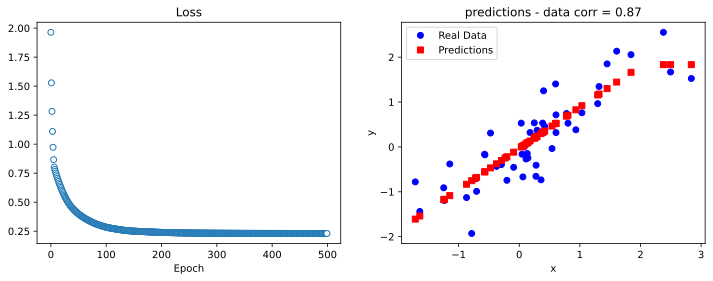

In [12]:
# create a dataset
x, y = createTheData(0.8)

# run the model
yHat, losses = buildAndTrainTheModel(x, y)

fix, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = 0.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x, y, 'bo', label = 'Real Data')
ax[1].plot(x, yHat.detach(), 'rs', label = 'Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'predictions - data corr = {np.corrcoef(y.T, yHat.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()


In [8]:
# takes 4 mins with 21 slopes and 50 epochs

# the slopes to simulate
slopes = np.linspace(-2, 2, 21)
numExps = 50

# initialize output matrix
results = np.zeros((len(slopes), numExps, 2))

for slopei in range(len(slopes)):
  for N in range(numExps):
    # creat a dataset and run the model
    x, y = createTheData(slopes[slopei])
    yHat, losses = buildAndTrainTheModel(x, y)

    # store the final loss and performance
    results[slopei, N, 0] = losses[-1]
    results[slopei, N, 1] = np.corrcoef(y.T, yHat.detach().T)[0, 1]

# correlation can be 0 if the model didn't do well. Set nan's -> 0
results[np.isnan(results)] = 0

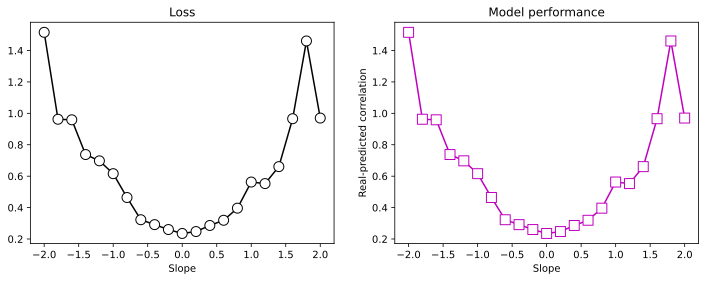

In [14]:
 # plot the results!
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(slopes, np.mean(results[:,:,0], axis = 1), 'ko-', markerfacecolor = 'w', markersize = 10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes, np.mean(results[:,:,:1], axis = 1), 'ms-', markerfacecolor = 'w', markersize = 10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()